In [142]:
import pandas as pd
import seaborn as sns

In [143]:
pd.set_option("max_columns", 80)

In [144]:
df = pd.read_csv('data/interim_data/cdc_data_cleaned.csv')

In [145]:
# Link to Census Data

#def read_csv_from_dropbox(dropbox_link):
    #path = dropbox_link[0:-1] + "1"
    #df = pd.read_csv(path)
    #return df
# df_census = read_csv_from_dropbox ('https://www.dropbox.com/s/pmxyfcyw5r5m3vf/Census%20Population%20Data.csv?dl=0')

In [146]:
df.head()

,resident_status,level_of_education,month_of_death,age,place_of_death_patient_status,marital_status,day_of_week_of_death,year_data_collected,manner_of_death,was_autopsy_done,place_of_injury_for_icd_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_causes_of_death,113_causes_of_death,130_causes_of_infant_death,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
0,RESIDENTS,Not Available,February,37,"Hospital, clinic or Medical Center",Married,Tuesday,2015,Natural,No,Not Available,O268,All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",4,11O268,21O995,31O268,2,O268,O903,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black
1,RESIDENTS,Not Available,January,56,"Hospital, clinic or Medical Center",Widowed,Tuesday,2015,Natural,No,Not Available,O268,All other direct obstetric causes,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",3,11O268,21O971,31O971,2,O268,O971,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black
2,RESIDENTS,Not Available,March,31,Other,Married,Tuesday,2015,Natural,No,Not Available,O881,Obstetric embolism,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O993,21O881,Not Available,1,O881,Not Available,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white
3,INTRASTATE NONRESIDENTS,Not Available,April,24,"Hospital, clinic or Medical Center",Divorced,Thursday,2015,Not Available,Unknown,Not Available,O065,Other and unspecified pregnancy with abortive ...,Pregnancy with abortive outcome,Not Available,"Pregnancy, childbirth and the puerperium",2,11O080,21O069,Not Available,1,O065,Not Available,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white
4,INSTRASTATE NONRESIDENTS,Not Available,July,28,"Hospital, clinic or Medical Center","Never married, Single",Saturday,2015,Natural,No,Not Available,O998,Indirect obstetric deaths,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O994,21O998,Not Available,2,O998,O994,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black


In [147]:
df['race'].unique()

array(['Black', 'White', 'American Indian (includes Aleuts and Eskimos)',
       'Chinese', 'Filipino', 'Asian Indian',
       'Other Asian or Pacific Islander in areas reporting codes 18-58',
       'Combined other Asian or Pacific Islander, includes codes 18-68',
       'Japanese', 'Vietnamese', 'Korean',
       'Hawaiian (includes Part-Hawaiian)', 'Guamanian', 'Samoan'],
      dtype=object)

In [148]:
df['race_recode_3'].unique()

array(['Black', 'White', 'Races other than White or Black'], dtype=object)

In [149]:
df['race_recode_5'].unique()

array(['Black', 'White', 'American Indian', 'Asian or Pacific Islander'],
      dtype=object)

In [150]:
df['hispanic_origin'].unique()

array(['Non – Hispanic', 'Mexican', 'South American', 'Central American',
       'Puerto Rican', 'Unknown', 'Central and South American',
       'Other Hispanic', 'Latin American', 'Cuban', 'Dominican',
       'Spaniard'], dtype=object)

In [151]:
df.shape

(7135, 29)

In [152]:
df[df['hispanic_origin'] == 'Non – Hispanic'].count()

resident_status                                        5993
level_of_education                                     5993
month_of_death                                         5993
age                                                    5993
place_of_death_patient_status                          5993
marital_status                                         5993
day_of_week_of_death                                   5993
year_data_collected                                    5993
manner_of_death                                        5993
was_autopsy_done                                       5993
place_of_injury_for_icd_w00_y34_except_y06_and_y07_    5993
icd_code_10th_revision                                 5993
358_causes_of_death                                    5993
113_causes_of_death                                    5993
130_causes_of_infant_death                             5993
39_cause_recode                                        5993
number_of_entity_axis_conditions        

In [153]:
df['manner_of_death'].unique()

array(['Natural', 'Not Available', 'Could not determine',
       'Pending investigation', 'Accident', 'Homicide', 'Suicide'],
      dtype=object)

In [154]:
df['race_recode_3'].describe()

count      7135
unique        3
top       White
freq       4401
Name: race_recode_3, dtype: object

In [155]:
df.shape

(7135, 29)

3417 rows in dataset => 3417 deaths
1108 black women deaths
2113 white women deaths
196 other races deaths

In [156]:
# Find total population of USA separated by race.
# If possible by white/black/other and by hispanic and non hispanic.

In [157]:
column1 = 'race_recode_3'
column2 = 'place_of_death_patient_status'

df_grouped_by_race_and_death_place = df.groupby([column1, column2]).size()
df_grouped_by_race_and_death_place
# place_of_death_patient_status

race_recode_3                    place_of_death_patient_status     
Black                            Descendent's home                       38
                                 Hospital, clinc or Medical Center       47
                                 Hospital, clinic or Medical Center    2131
                                 Nursing home/long term care             24
                                 Other                                   52
                                 Place of death unknown                  29
Races other than White or Black  Descendent's home                        2
                                 Hospital, clinc or Medical Center        4
                                 Hospital, clinic or Medical Center     393
                                 Nursing home/long term care              5
                                 Other                                    8
                                 Place of death unknown                   1
White               

# Reusable DFs

In [158]:
df_hispanic = df[df["hispanic_origin"] != "Non – Hispanic"]

In [159]:
df_non_hispanic = df[df["hispanic_origin"] == "Non – Hispanic"]

# How are hispanics represented among different races?

In [160]:
def group_by_race(df):
    return df.groupby(df['race_recode_3']).size()

In [161]:
df_grouped_by_race = group_by_race(df)
df_grouped_by_race

race_recode_3
Black                              2321
Races other than White or Black     413
White                              4401
dtype: int64

In [162]:
group_by_race(df_hispanic)

race_recode_3
Black                                24
Races other than White or Black      15
White                              1103
dtype: int64

In [163]:
group_by_race(df_non_hispanic)

race_recode_3
Black                              2297
Races other than White or Black     398
White                              3298
dtype: int64

# How does the number of total deaths look like?

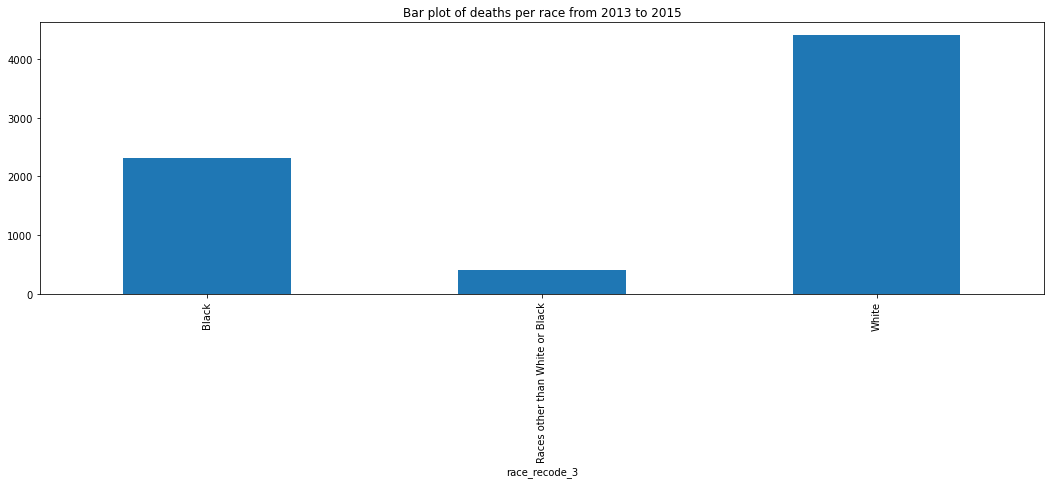

In [164]:
df_grouped_by_race.plot.bar(
    title=f'Bar plot of deaths per race from 2013 to 2015',
    figsize=(18,5)
)

# We Need to find total population of black/white women to see what's the maternal mortality percentage.
# If possible, do same analysis including hispanic, and same anaylisys excluding hispanic

# How does the number of deaths change as the years go by?

In [165]:
df_deaths_by_year = df.groupby(['year_data_collected']).size()
df_deaths_by_year

year_data_collected
2009     960
2010     829
2011     936
2012     993
2013    1142
2014    1131
2015    1144
dtype: int64

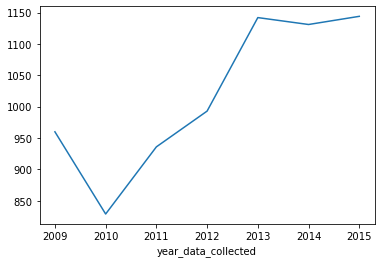

In [166]:
df_deaths_by_year.plot.line()

**It seems that there is a growing trend in the number of maternal deaths**

In [167]:
df_grouped_by_race_and_year = df.groupby(['race_recode_3', 'year_data_collected']).size()
df_grouped_by_race_and_year = df_grouped_by_race_and_year.reset_index()
df_grouped_by_race_and_year = df_grouped_by_race_and_year.rename(columns={0:'count'})
df_grouped_by_race_and_year

,race_recode_3,year_data_collected,count
0,Black,2009,307
1,Black,2010,265
2,Black,2011,305
3,Black,2012,336
4,Black,2013,364
5,Black,2014,370
6,Black,2015,374
7,Races other than White or Black,2009,47
8,Races other than White or Black,2010,58
9,Races other than White or Black,2011,59


Text(0.5, 0, 'Year')

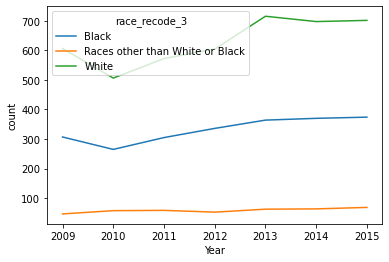

In [168]:
ax = sns.lineplot(
    data=df_grouped_by_race_and_year,
    x='year_data_collected',
    y="count",
    hue='race_recode_3',
)
ax.set_xlabel('Year')

**The growing trend in the total number of maternal deaths is true for the different ethnic groups looked at**

# Do different races die of the same causes, when compared with that same race population? Does this change when we include/exclude hispanics?

In [169]:
def create_race_heatmap(df, column):
    event_count_table = pd.crosstab(
        index=df['race_recode_3'],
        columns=df[column],
        normalize='index'
    )
    
    return sns.heatmap(event_count_table, cmap='Reds', linewidths=1.5)

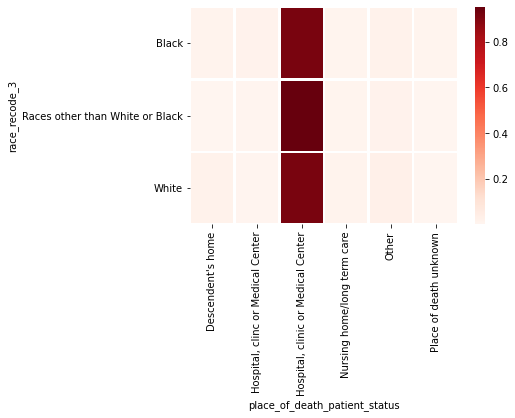

In [170]:
# with hispanics
create_race_heatmap(df, 'place_of_death_patient_status')

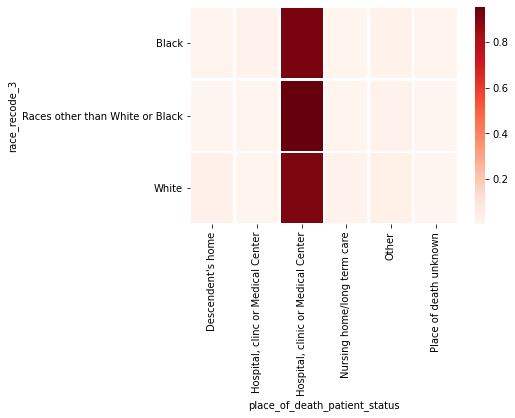

In [171]:
# 'Non – Hispanic'
create_race_heatmap(df_non_hispanic, 'place_of_death_patient_status')

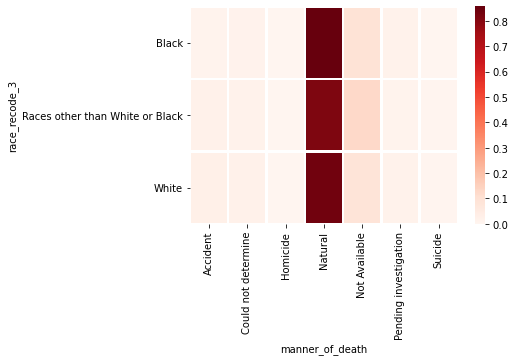

In [172]:
# hispanic
create_race_heatmap(df, 'manner_of_death')

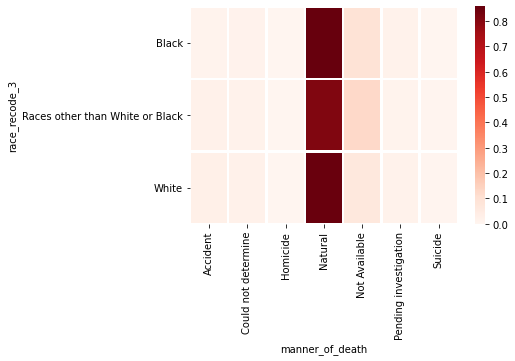

In [173]:
# non-hispanic
create_race_heatmap(df_non_hispanic, 'manner_of_death')

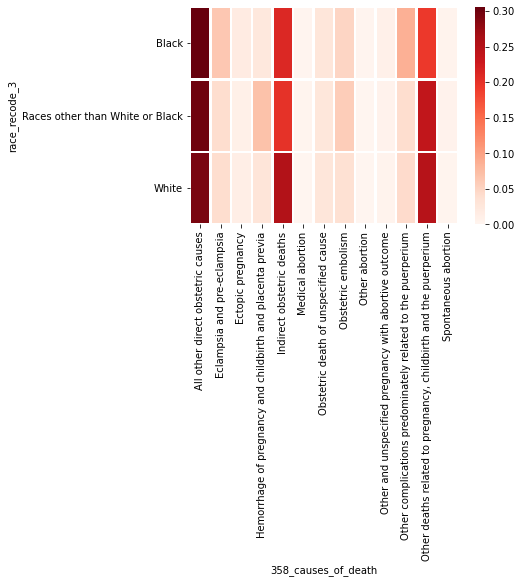

In [174]:
# with hispanics
create_race_heatmap(df, '358_causes_of_death')

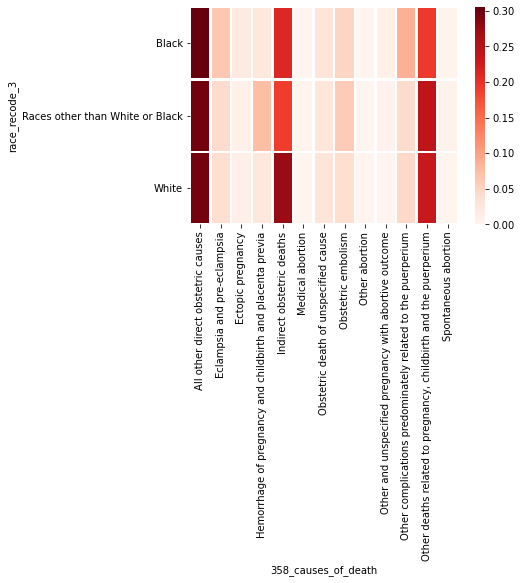

In [175]:
# without hispanics
create_race_heatmap(df_non_hispanic, '358_causes_of_death')

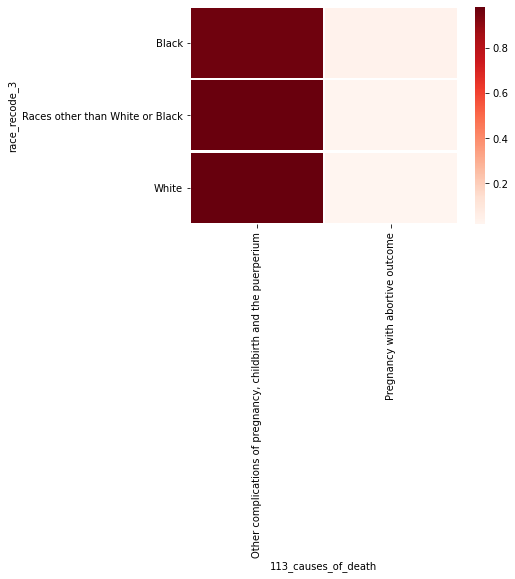

In [176]:
# without hispanics
create_race_heatmap(df_non_hispanic, '113_causes_of_death')

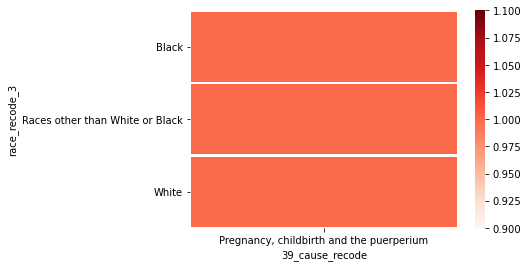

In [177]:
# without hispanics
create_race_heatmap(df_non_hispanic, '39_cause_recode')

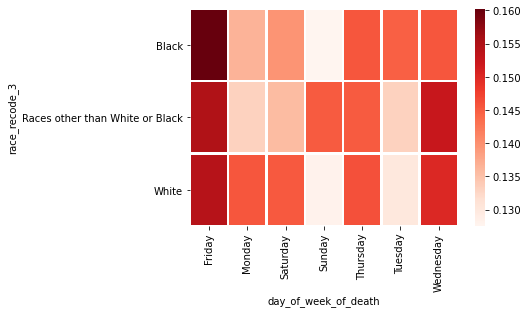

In [178]:
# with hispanics
create_race_heatmap(df, 'day_of_week_of_death')

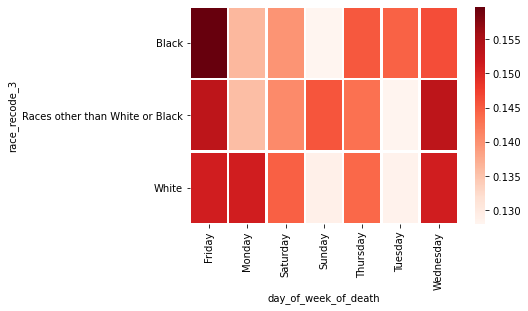

In [179]:
# non-hispanics
create_race_heatmap(df_non_hispanic, 'day_of_week_of_death')

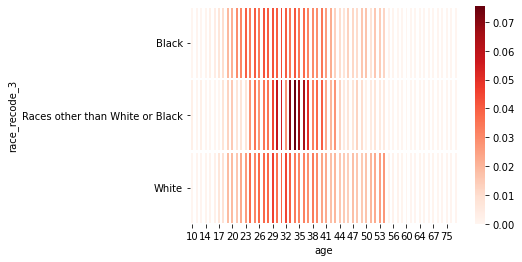

In [180]:
# with hispanics
create_race_heatmap(df_non_hispanic, 'age')

**The main causes of death seem to be the same for each race analyzed.  It might be worth to investigate further why black women die more of eclampsia and pre-eclampsia.**

----

# Is the percentage of missing data constant for different races, when compared with that same race population? Does this change when we include/exclude hispanics?

In [181]:
def get_na_numbers_per_race(df, race, column_name):
    df_race = df[df["race_recode_3"] == race]
    na_race = df_race[df[column_name] == 'Not Available']
    race_pct = len(na_race) / len(df_race)
    return race_pct

In [182]:
def compare_na_numbers_per_race(df, column_name):
    white = get_na_numbers_per_race(df, 'White', column_name)
    black = get_na_numbers_per_race(df, 'Black', column_name)
    other = get_na_numbers_per_race(df, 'Races other than White or Black', column_name)
        
    print(f'The number of N/A records for the column {column_name} are {white} for white, {black} for black, {other} for other races')

In [183]:
compare_na_numbers_per_race(df, 'manner_of_death')

The number of N/A records for the column manner_of_death are 0.08748011815496479 for white, 0.0952175786299009 for black, 0.12832929782082325 for other races


<ipython-input-181-98adcb215370>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  na_race = df_race[df[column_name] == 'Not Available']


In [184]:
compare_na_numbers_per_race(df_non_hispanic, 'manner_of_death')

The number of N/A records for the column manner_of_death are 0.06731352334748332 for white, 0.09447104919460166 for black, 0.1306532663316583 for other races


<ipython-input-181-98adcb215370>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  na_race = df_race[df[column_name] == 'Not Available']


In [185]:
compare_na_numbers_per_race(df, 'icd_code_10th_revision')

The number of N/A records for the column icd_code_10th_revision are 0.0 for white, 0.0 for black, 0.0 for other races


<ipython-input-181-98adcb215370>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  na_race = df_race[df[column_name] == 'Not Available']


In [186]:
# Finish missing values analysis

-----

# What's the most common icd causes of death among each race?  Does this change when we include/exclude hispanics?

In [187]:
def most_common_icd_10_code(df):
    icd_causes_of_death_by_race = df.groupby(["race_recode_3", "icd_code_10th_revision"]).size().to_frame().reset_index()
    icd_causes_of_death_by_race = icd_causes_of_death_by_race.rename(columns={0:'count'})
    icd_causes_of_death_by_race = icd_causes_of_death_by_race.sort_values(['race_recode_3', 'count'], ascending = (True, False))
    icd_causes_of_death_by_race = icd_causes_of_death_by_race.groupby('race_recode_3').head(5)
    return icd_causes_of_death_by_race

In [188]:
most_common_icd_10_code(df)

,race_recode_3,icd_code_10th_revision,count
52,Black,O268,393
120,Black,O998,196
116,Black,O994,169
101,Black,O960,160
96,Black,O903,151
142,Races other than White or Black,O268,65
185,Races other than White or Black,O998,41
172,Races other than White or Black,O960,36
173,Races other than White or Black,O961,29
183,Races other than White or Black,O994,27


In [189]:
df_eclampsia = df[df['358_causes_of_death'] == 'Eclampsia and pre-eclampsia']

In [190]:
most_common_icd_10_code(df_eclampsia)

,race_recode_3,icd_code_10th_revision,count
9,Black,O16,42
5,Black,O149,38
8,Black,O159,33
4,Black,O142,10
3,Black,O141,6
13,Races other than White or Black,O149,5
14,Races other than White or Black,O159,4
12,Races other than White or Black,O142,3
15,Races other than White or Black,O16,3
10,Races other than White or Black,O11,1


Looking at the most common icd 10 codes per race, we don't see any signifcant trend.  We then decided to take a further look at the women with pre-elampsia and eclampsia, since we noticed in an earlier step that black women seem to die more from it when compared to other races.
The number of deaths of Black Women in the top 3 categories is very high, considering that they represent a much smaller part of the population.
As pre-elampsia and eclampsia are known high risk factors, maybe some of those deaths could be prevented. 

In [191]:
most_common_icd_10_code(df_non_hispanic)

,race_recode_3,icd_code_10th_revision,count
51,Black,O268,387
119,Black,O998,196
115,Black,O994,167
100,Black,O960,159
95,Black,O903,151
141,Races other than White or Black,O268,64
184,Races other than White or Black,O998,39
171,Races other than White or Black,O960,36
172,Races other than White or Black,O961,28
182,Races other than White or Black,O994,25


In [192]:
df_eclampsia_non_hispanic = df[(df['358_causes_of_death'] == 'Eclampsia and pre-eclampsia') & (df["hispanic_origin"] == "Non – Hispanic")]

In [193]:
df_eclampsia_non_hispanic

,resident_status,level_of_education,month_of_death,age,place_of_death_patient_status,marital_status,day_of_week_of_death,year_data_collected,manner_of_death,was_autopsy_done,place_of_injury_for_icd_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_causes_of_death,113_causes_of_death,130_causes_of_infant_death,39_cause_recode,number_of_entity_axis_conditions,entity_condition_1,entity_condition_2,entity_condition_3,number_of_record_axis_conditions,record_condition_1,record_condition_2,record_condition_3,race,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
7,RESIDENTS,Not Available,October,38,"Hospital, clinic or Medical Center","Never married, Single",Saturday,2015,Could not determine,Yes,Not Available,O16,Eclampsia and pre-eclampsia,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",4,11O268,21O992,31O998,2,O16,O268,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black
19,RESIDENTS,4.0,September,26,"Hospital, clinic or Medical Center","Never married, Single",Sunday,2015,Natural,No,Not Available,O150,Eclampsia and pre-eclampsia,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",2,11O159,21O16,Not Available,3,O150,O159,O16,White,White,White,Non – Hispanic,Non - Hispanic white
24,RESIDENTS,3.0,January,39,"Hospital, clinic or Medical Center","Never married, Single",Thursday,2015,Natural,Yes,Not Available,O159,Eclampsia and pre-eclampsia,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",1,11O159,Not Available,Not Available,1,O159,Not Available,Not Available,Black,Black,Black,Non – Hispanic,Non - Hispanic black
26,RESIDENTS,5.0,January,36,"Hospital, clinic or Medical Center",Married,Friday,2015,Natural,Yes,Not Available,O149,Eclampsia and pre-eclampsia,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",6,11O268,21O998,31O759,3,O149,O249,O268,White,White,White,Non – Hispanic,Non - Hispanic white
31,RESIDENTS,no education item on certificate,April,29,"Hospital, clinic or Medical Center","Never married, Single",Sunday,2015,Natural,Yes,Not Available,O16,Eclampsia and pre-eclampsia,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",1,11O16,Not Available,Not Available,1,O16,Not Available,Not Available,American Indian (includes Aleuts and Eskimos),Races other than White or Black,American Indian,Non – Hispanic,Non - Hispanic other races
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7064,RESIDENTS,6.0,July,37,"Hospital, clinic or Medical Center",Married,Sunday,2009,Natural,No,Not Available,O149,Eclampsia and pre-eclampsia,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",3,11O994,21O994,31O149,1,O149,Not Available,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white
7075,RESIDENTS,Not Available,May,35,"Hospital, clinic or Medical Center",Married,Thursday,2009,Natural,Yes,Not Available,O149,Eclampsia and pre-eclampsia,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",3,11O149,61O249,62O992,2,O149,O249,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white
7084,INTRASTATE NONRESIDENTS,Not Available,August,20,"Hospital, clinic or Medical Center","Never married, Single",Saturday,2009,Natural,Yes,Not Available,O141,Eclampsia and pre-eclampsia,"Other complications of pregnancy, childbirth a...",Not Available,"Pregnancy, childbirth and the puerperium",5,11O991,21O998,31O141,2,O141,O903,Not Available,White,White,White,Non – Hispanic,Non - Hispanic white
7115,INTRASTATE NONRESIDENTS,3.0,June,25,"Hospital, clinic or Medical Center","Never married, Single",Tuesday,2009,Natural,Yes,Not Available,O11,Eclampsia an

In [194]:
most_common_icd_10_code(df_eclampsia_non_hispanic)

,race_recode_3,icd_code_10th_revision,count
9,Black,O16,42
5,Black,O149,38
8,Black,O159,33
4,Black,O142,10
3,Black,O141,6
13,Races other than White or Black,O149,5
14,Races other than White or Black,O159,4
12,Races other than White or Black,O142,3
15,Races other than White or Black,O16,3
10,Races other than White or Black,O11,1


---

In [195]:
df['level_of_education'].describe()

count     7135
unique      10
top        3.0
freq      2381
Name: level_of_education, dtype: object

In [196]:
df['level_of_education'].unique()

array(['Not Available', '4.0', 'no education item on certificate', '3.0',
       '5.0', '2003 revision of education item on certificate', '9.0',
       '6.0', '7.0', '8.0'], dtype=object)